In [2]:
import praw
from praw.models import MoreComments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import stylecloud
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [3]:
reddit = praw.Reddit(client_id='Uqa0qPvYrRATm6WB2yy6vw', client_secret='ExLLWnJZrEJ5XrSdU9GQ074YOoOg5A', user_agent='sentiment')

In [4]:
def get_whole_thread(submission):
    # d = {}
    comments = []
    for top_level_comment in submission.comments:
        # print("COMMENT:")
        # print(top_level_comment.body)
        # d[top_level_comment.body] = []
        comments.append(top_level_comment.body)
        replies = []
        replies.extend(top_level_comment.replies)
        while replies:
            reply = replies.pop(0)
            if isinstance(reply, MoreComments):
                continue
            # print("    SUBCOMMENT:")
            # print(reply.body)
            # d[top_level_comment.body].append(reply.body)
            comments.append(reply.body)
            # print("________")
            replies = list(reply.replies) + replies
    return comments

In [5]:
subreddit = reddit.subreddit("SGExams")
cnt = 0
posts = []
print("start")
for submission in subreddit.search("smu computing law"):
    post = []
    post.append(submission.title)
    post.append(submission.selftext)
    comments = get_whole_thread(submission)
    post.append(comments)
    posts.append(post)

print('end')

start
end


In [6]:
df = pd.DataFrame(posts,columns=['title', 'body', 'comments'])
# print(df)
# df.to_csv("reddit_sg_exams.csv", sep='\t')
df.head()

,title,body,comments
0,[Uni] Computer Science NUS vs NTU vs SMU,Hi post As student here! I'm currently looking...,[Hi! You can find the sex ratio for each cours...
1,[Uni] NUS CHS or SMU Computing & Law?,Got offered both courses after getting rejecte...,"[[deleted], actually i would say that computin..."
2,[Uni] SMU Computing and Law,Hello! Anyone here is familiar with the curric...,[My reply to a similar post: [https://www.redd...
3,[Uni] SMU COMPUTING AND LAW,my cgpa in poly was 3.91 and i applied for bot...,"[Personally, I wouldn't recommend C&L as it em..."
4,[UNI] SMU LAW + COMPUTING DDP,During my law interview the Prof told me that ...,[1. Your gpa needs to be 3.8/4.0 to apply for ...


In [9]:
#Show the titles that contain Computing Law, CS, SMU and
law_computing = df
qn_content =""
for line in law_computing['title']:
    #print(line)
    if 'smu' in line.lower() and 'computing' in line.lower() and 'law' in line.lower(): 
#         qn_content += line.lower() + ' '    
        print(line)

[Uni] NUS CHS or SMU Computing & Law?
[Uni] SMU Computing and Law
[Uni] SMU COMPUTING AND LAW
[UNI] SMU LAW + COMPUTING DDP
[UNI] SMU COMPUTING AND LAW( NEED INFORMATION ON LAW MODS) HELPಥ‿ಥಥ‿ಥ
[Uni] SMU computing and law or NUS life science?
[UNI] SMU LAW + COMPUTING DDP
[uni] SMU computing and law
[University] SMU Bsc(Computing and Law)


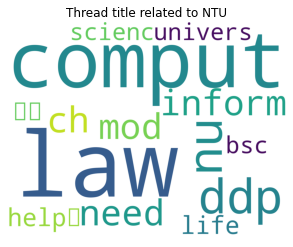

In [10]:
#Cloud word for titles that contain NTU, SMU CS
stop_words = stopwords.words('english')
stop_words.extend(['ntu', 'uni', 'smu', 'cs', 'vs', 'level', 'levels'])

qn_content = ''
for line in df['title']:
    if 'smu' in line.lower() and 'computing' in line.lower() and 'law' in line.lower(): 
        qn_content += line.lower() + ' '    
        #print(line)

# Tokenize Words
tokenizer = RegexpTokenizer(r'\w+')
words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words

# Remove stop words
words_filtered = []
for w in words_content:
    if w not in stop_words:
        words_filtered.append(w)

# Porter Stemmer
porter_stemmer = PorterStemmer()

words_stemmed = []
for w in words_filtered:
    words_stemmed.append(porter_stemmer.stem(w))

# WordCloud
words_joined = " ".join([w for w in words_stemmed])

# Create a word cloud
my_wordcloud = WordCloud(background_color='white',
                     width=1800,
                     height=1400).generate(words_joined)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.title('Thread title related to NTU')
plt.show()

In [20]:
only_law = law_computing[law_computing['title'].str.contains('Law')]
only_law_computing = only_law[only_law['title'].str.contains('Computing')]
only_law_computing.head()

,title,body,comments
1,[Uni] NUS CHS or SMU Computing & Law?,Got offered both courses after getting rejecte...,"[[deleted], actually i would say that computin..."
2,[Uni] SMU Computing and Law,Hello! Anyone here is familiar with the curric...,[My reply to a similar post: [https://www.redd...
12,[University] SMU Bsc(Computing and Law),>The BSc (Computing & Law) Degree produces IT ...,"[[deleted], U got offered from SMU law already..."


In [21]:
# original stopwords
def original_stopwords():
    return stopwords.words('english')

In [22]:
def extract_text(df):
    for(columnName, columnData) in df.iteritems():
        qn_content = []
        for line in df[columnName]:
            if len(line.strip()) > 0: # Eliminates empty answers
                qn_content.append(line)
    return qn_content

In [23]:
# Helper Function for Tokenisation of text content, returns a list of word or words depending on ngrams defined
import string

def token_fn(sentence_list, n, stop_words_custom):
    output = []
    output2 = []
    for line in sentence_list:
        #remove punctuations
        new_string = line.translate(str.maketrans('', '', string.punctuation))
        new_string = new_string.replace('“', '')
        new_string = new_string.replace('”', '')
        
        x = new_string.split()
        
        for word in x:
            if word not in stop_words_custom:
                #print(word)
                output.append(word)

        sentence = ""
        for word in output:
            sentence += word + " "
        
        token = word_tokenize(sentence)
        gram = list(ngrams(token, n))

        if n == 1:
            for content in gram:
                for word in content:
                    output2.append(word)  
        else:
            for content in gram:
                link = ''
                for word in content:
                    link += word + '_'
                link = link[:-1]
                output2.append(link)
                
    return output2

def wc_fn(word_list, title, no_word_max):
    words_joined = " ".join([w for w in word_list])
    my_wordcloud = WordCloud(background_color='white', max_words = no_word_max, 
                             max_font_size = 1000,
                             width=3000,
                             height=2000).generate(words_joined)
    plt.imshow(my_wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

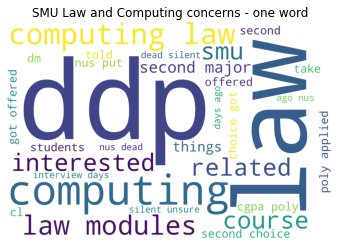

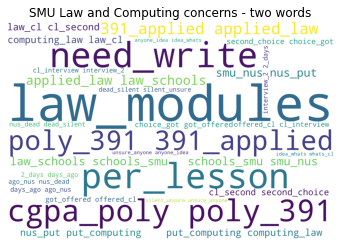

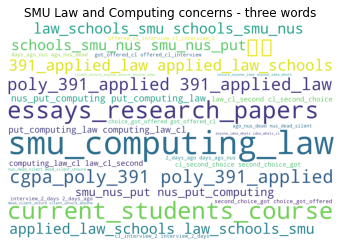

In [39]:
# # Top commmon body for SMU & NTU

only_law_computing_body = only_law_computing.iloc[:, [1]]

sw = original_stopwords()
sw.extend(['exactly','x200b' , 'boil','nt', "n't",'rlly', 'u','hi', 'tat', 'much', 'sure', 'im', 'thank', 'really', "i'm", 'lol', 'bro', 'cmi', 
           'hahah' , 'one', 'well', 'hey', 'hey,' , 'also', 'would' , 'bat', 'right'])

sentences = []
for sentence in only_law_computing_body["body"]:
    #sentences = []
    if len(sentence.lower().strip()) > 0 and 'https' not in sentence.lower():
        # print(sentence)
       # print('------------')
        sentences.append(sentence.lower())
    
    
single_word = token_fn(sentences, 1, sw)
wc_fn(single_word, 'SMU Law and Computing concerns - one word', 30)

double_word = token_fn(sentences, 2, sw)
wc_fn(double_word, 'SMU Law and Computing concerns - two words', 30)

triple_word = token_fn(sentences, 3, sw)
wc_fn(triple_word, 'SMU Law and Computing concerns - three words', 30)

In [40]:
only_laws = law_computing[law_computing['title'].str.contains('LAW')]
only_law_computing = only_laws[only_laws['title'].str.contains('COMPUTING')]
only_law_computing.head()

,title,body,comments
3,[Uni] SMU COMPUTING AND LAW,my cgpa in poly was 3.91 and i applied for bot...,"[Personally, I wouldn't recommend C&L as it em..."
4,[UNI] SMU LAW + COMPUTING DDP,During my law interview the Prof told me that ...,[1. Your gpa needs to be 3.8/4.0 to apply for ...
5,[UNI] SMU COMPUTING AND LAW( NEED INFORMATION ...,"Currently, I have two offers, one for sutd and...",[>How are law modules taught in smu ?\n\nSemin...
7,[UNI] SMU LAW + COMPUTING DDP,During my law interview the Prof told me that ...,[think about the purpose of it as well - what'...


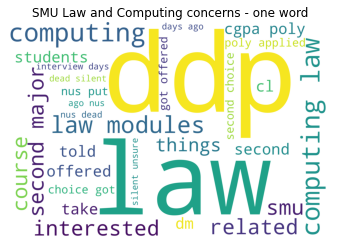

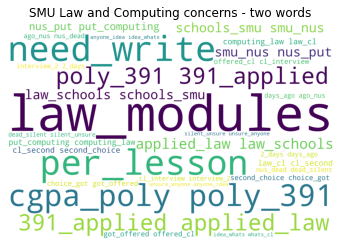

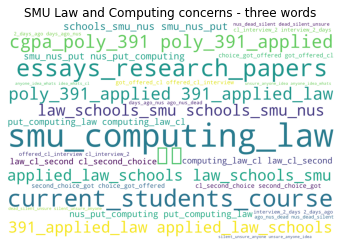

In [41]:
# # Top commmon body for SMU & NTU

only_law_computing_body = only_law_computing.iloc[:, [1]]

sw = original_stopwords()
sw.extend(['exactly','x200b' , 'boil','nt', "n't",'rlly', 'u','hi', 'tat', 'much', 'sure', 'im', 'thank', 'really', "i'm", 'lol', 'bro', 'cmi', 
           'hahah' , 'one', 'well', 'hey', 'hey,' , 'also', 'would' , 'bat', 'right'])

sentences = []
for sentence in only_law_computing_body["body"]:
    #sentences = []
    if len(sentence.lower().strip()) > 0 and 'https' not in sentence.lower():
        #print(sentence)
        #print('------------')
        sentences.append(sentence.lower())
    
    
single_word = token_fn(sentences, 1, sw)
wc_fn(single_word, 'SMU Law and Computing concerns - one word', 30)

double_word = token_fn(sentences, 2, sw)
wc_fn(double_word, 'SMU Law and Computing concerns - two words', 30)

triple_word = token_fn(sentences, 3, sw)
wc_fn(triple_word, 'SMU Law and Computing concerns - three words', 30)

In [42]:
# #Total number of insights

smu_ntu_comments = only_ntu.iloc[:, [2]]

sentences = []
noOfThread = 0
totalComments = 0
for commentArray in smu_ntu_comments["comments"]:
    noOfThread += 1
    valueArray = 0
    for comment in commentArray:
        valueArray += 1
        totalComments += 1

print(noOfThread , ' no of Threads and' , totalComments , 'Comments for all Threads')
print('Average comments per thread: ' , totalComments/noOfThread)

7  no of Threads and 45 Comments for all Threads
Average comments per thread:  6.428571428571429
